In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
%matplotlib inline

import seaborn as sns


In [2]:
#scrape data from Yahoo finance API - 10 years of data
yf.pdr_override()
tickers = ['LVMUY', 'MSFT', 'WMT', 'GLD', 'T']
start_date = dt.datetime(2013,3,1)
end_date = dt.datetime(2023,3,1)


portfolio1 = pdr.get_data_yahoo(tickers,start=start_date, end = end_date)['Adj Close']
portfolio1

[*********************100%***********************]  5 of 5 completed


,GLD,LVMUY,MSFT,T,WMT
Date,,,,,
2013-03-01,152.440002,25.368416,23.179550,12.836047,57.456474
2013-03-04,152.300003,25.361023,23.345411,12.914469,58.673820
2013-03-05,152.380005,25.812180,23.511278,13.046361,59.042233
2013-03-06,153.229996,25.834366,23.295652,12.935853,58.769928
2013-03-07,152.690002,26.167194,23.337120,12.971499,58.721874
...,...,...,...,...,...
2023-02-22,169.660004,171.460007,251.509995,19.379999,144.240005
2023-02-23,169.570007,172.759995,254.770004,19.350000,142.089996
2023-02-24,168.350006,165.380005,249.220001,19.240000,142.470001


In [3]:
type(portfolio1)

pandas.core.frame.DataFrame

In [4]:
#check dataframe info
portfolio1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     2517 non-null   float64
 1   LVMUY   2517 non-null   float64
 2   MSFT    2517 non-null   float64
 3   T       2517 non-null   float64
 4   WMT     2517 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


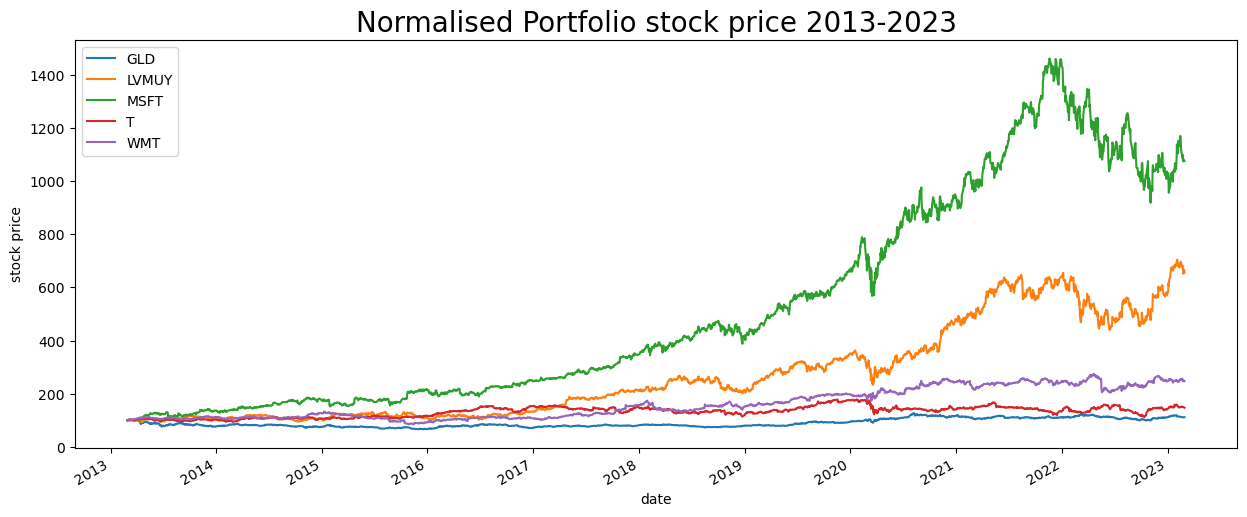

In [5]:
#Plot a graph to show the Normalised Portfolio stock price 2008-2023
(portfolio1 / portfolio1.iloc[0] * 100).plot(figsize = (15, 6));
plt.title('Normalised Portfolio stock price 2013-2023', fontsize=20)
plt.xlabel('date')
plt.ylabel('stock price')
plt.show()

In [6]:
#Calculating the log Return of a Portfolio of Securities

P1_returns = np.log(portfolio1 / portfolio1.shift(1))
P1_returns

,GLD,LVMUY,MSFT,T,WMT
Date,,,,,
2013-03-01,NaN,NaN,NaN,NaN,NaN
2013-03-04,-0.000919,-0.000291,0.007130,0.006091,0.020966
2013-03-05,0.000525,0.017633,0.007080,0.010161,0.006259
2013-03-06,0.005563,0.000859,-0.009213,-0.008506,-0.004623
2013-03-07,-0.003530,0.012801,0.001778,0.002752,-0.000818
...,...,...,...,...,...
2023-02-22,-0.005642,0.000292,-0.004602,0.008811,-0.021196
2023-02-23,-0.000531,0.007553,0.012878,-0.001549,-0.015018
2023-02-24,-0.007221,-0.043657,-0.022025,-0.005701,0.002671


In [7]:
#Annualised covariance matrix
P1_cov_matrix_a = P1_returns.cov() * 250
P1_cov_matrix_a

,GLD,LVMUY,MSFT,T,WMT
GLD,0.022774,0.002289,0.000952,0.001203,0.001061
LVMUY,0.002289,0.081698,0.039380,0.020962,0.015925
MSFT,0.000952,0.039380,0.073846,0.018742,0.019631
T,0.001203,0.020962,0.018742,0.044885,0.014214
WMT,0.001061,0.015925,0.019631,0.014214,0.042121


In [8]:
P1_securities = portfolio1.columns.tolist()
P1_securities

['GLD', 'LVMUY', 'MSFT', 'T', 'WMT']

In [9]:
#Annualised returns
P1_annual_returns = P1_returns.mean() * 250
P1_annual_returns

GLD      0.010705
LVMUY    0.187030
MSFT     0.236076
T        0.038497
WMT      0.089995
dtype: float64

**Equal weights analysis**

In [10]:
#assuming equal weights
weights_e = np.array([0.2, 0.2,0.2, 0.2, 0.2])

In [11]:
#Portfolio Variance(risk):
pfolio_var = np.dot(weights_e.T, np.dot(P1_returns.cov() * 250, weights_e))
pfolio_var

0.021361729847469375

In [12]:
#Portfolio Volatility(portfolio's risk per unit of return, sqrt of the portfolio variance):
pfolio_vol = (np.dot(weights_e.T, np.dot(P1_returns.cov() * 250, weights_e))) ** 0.5
pfolio_vol

0.14615652516213354

In [13]:
print ('Portfolio volatility(equal weights):',str(round(pfolio_vol, 3) * 100) + ' %')

Portfolio volatility(equal weights): 14.6 %


In [14]:
assets = P1_securities
num_assets = len(assets)
num_assets

5

In [15]:
equal_weights = np.ones(num_assets) / num_assets
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [16]:
equal_weighted_return = np.sum(equal_weights * P1_returns.mean()) * 250
equal_weighted_return

0.1124606319772365

In [17]:
equal_weighted_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(P1_returns.cov() * 250, equal_weights)))
equal_weighted_volatility

0.14615652516213354

In [18]:
equal_weighted_sharpe = (equal_weighted_return - 0.037) / equal_weighted_volatility
equal_weighted_sharpe

0.516300123402133

In [19]:
results_dict = {
    
    
    "Portfolio": ["Equal-Weighted", ],
    "Return": [equal_weighted_return],
    "Volatility": [equal_weighted_volatility],
    "Sharpe Ratio": [equal_weighted_sharpe]
}

results_df = pd.DataFrame(results_dict)

# Set the Portfolio column as the index
results_df.set_index("Portfolio", inplace=True)

results_df = results_df.transpose()
results_df

Portfolio,Equal-Weighted
Return,0.112461
Volatility,0.146157
Sharpe Ratio,0.516300


different weights

In [20]:
weights_ef = np.random.random(num_assets)
weights_ef /= np.sum(weights_ef)
weights_ef


array([0.12282373, 0.22631017, 0.37654879, 0.21637995, 0.05793735])

In [21]:
#Assume US 10 year Treasury yield as risk free rate as at 16 Mar 2023 (0.0345)
risk_free_rate = 0.0345


In [38]:
pfolio_returns1 = []
pfolio_volatilities1 = []
pfolio_weights1 = []


for x in range(30000):
    weights_ef = np.random.random(num_assets)
    weights_ef /= np.sum(weights_ef)
    pfolio_returns1.append(np.sum(weights_ef * P1_returns.mean()) * 250)
    pfolio_volatilities1.append(np.sqrt(np.dot(weights_ef.T,np.dot(P1_returns.cov() * 250, weights_ef))))
    pfolio_weights1.append(weights_ef)
    
    # If any weights are negative, discard the iteration
    if np.any(weights_ef < 0):
        pfolio_returns1.pop()
        pfolio_volatilities1.pop()
        pfolio_weights1.pop()

pfolio_returns1 = np.array(pfolio_returns1)
pfolio_volatilities1 = np.array(pfolio_volatilities1)
pfolio_weights1 = np.array(pfolio_weights1)

portfolios1 = pd.DataFrame({'Return': pfolio_returns1, 'Volatility': pfolio_volatilities1})
portfolios1['Sharpe'] = (portfolios1['Return'] - 0.037) / portfolios1['Volatility']
portfolios1['Weights'] = list(pfolio_weights1)

# Filter out portfolios1 with negative weights
portfolios1 = portfolios1[[all(weights >= 0) for weights in portfolios1['Weights']]]

max_sharpe_port_positive = portfolios1.iloc[portfolios1['Sharpe'].idxmax()]
max_sharpe_port_positive

Return                                                 0.201364
Volatility                                             0.222315
Sharpe                                                 0.739327
Weights       [0.02385414636097059, 0.31958225865489115, 0.5...
Name: 10562, dtype: object

In [39]:
portfolios1

,Return,Volatility,Sharpe,Weights
0,0.112685,0.160977,0.470158,"[0.17610727151876954, 0.2803250935778468, 0.18..."
1,0.126501,0.149614,0.598214,"[0.23691217010320678, 0.1115129253506423, 0.33..."
2,0.057236,0.131001,0.154475,"[0.2822156798439572, 0.03362438580779458, 0.05..."
3,0.147588,0.168226,0.657377,"[0.17519810091799126, 0.10589778328447724, 0.4..."
4,0.100837,0.135021,0.472797,"[0.3453609414492912, 0.24472769963608004, 0.11..."
...,...,...,...,...
29995,0.111458,0.138589,0.537258,"[0.28313438922356016, 0.12642066974500663, 0.2..."
29996,0.124308,0.165310,0.528145,"[0.061360637657438766, 0.2690484322369833, 0.1..."
29997,0.076828,0.146510,0.271846,"[0.1215383812806198, 0.06976682667171918, 0.06..."
29998,0.053493,0.126313,0.130573,"[0.30900810144448493, 0.043565417271468634, 0...."


In [40]:
min_vol_port_positive = portfolios1.iloc[portfolios1['Volatility'].idxmin()]
min_vol_port_positive

Return                                                 0.046335
Volatility                                             0.114025
Sharpe                                                 0.081864
Weights       [0.5389800592363082, 0.06235674426901584, 0.01...
Name: 28453, dtype: object

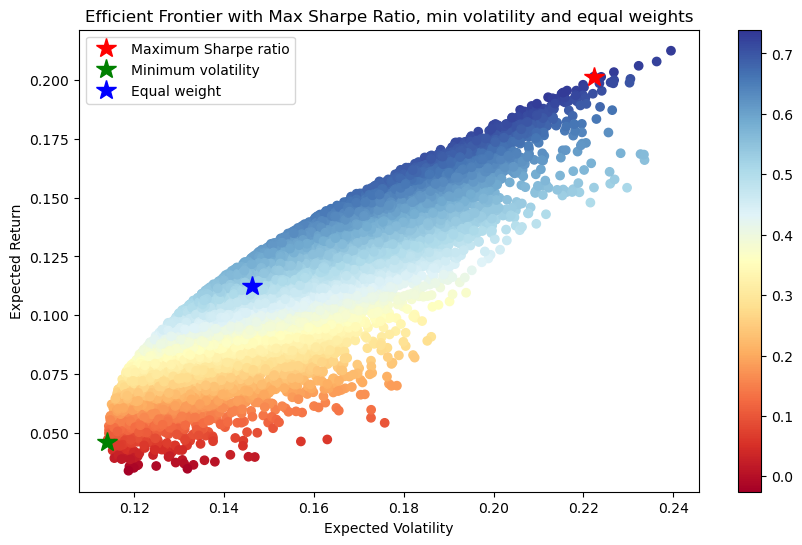

In [41]:
#Plot the efficient frontier with the optimal portfolios:
plt.subplots(figsize=(10, 6))
plt.scatter(portfolios1['Volatility'], portfolios1['Return'], c=portfolios1['Sharpe'], cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Max Sharpe Ratio, min volatility and equal weights')
plt.plot(max_sharpe_port_positive['Volatility'], max_sharpe_port_positive['Return'], 'r*', markersize=15.0, label='Maximum Sharpe ratio')

plt.plot(min_vol_port_positive['Volatility'], min_vol_port_positive['Return'], 'g*', markersize=15.0, label='Minimum volatility')

plt.plot(equal_weighted_volatility, equal_weighted_return, 'b*', markersize=15.0, label='Equal weight')

plt.legend()
plt.show()

In [42]:
#visualisation
# Create pie chart for Maximum Sharpe Ratio Portfolio
# Get the weights of the assets for the maximum Sharpe ratio portfolio
max_sharpe_weights = max_sharpe_port_positive['Weights']
max_sharpe_weights_df = pd.DataFrame(max_sharpe_weights, index=assets, columns=['Maximum_Sharpe_Ratio_Portfolio_Weights'])

# Get the weights of the assets for the minimum volatility portfolio
min_vol_weights = min_vol_port_positive['Weights']
min_vol_weights_df = pd.DataFrame(min_vol_weights, index=assets, columns=['Minimum_Volatility_Portfolio_Weights'])

# Merge the two dataframes
weights_table = pd.concat([max_sharpe_weights_df, min_vol_weights_df], axis=1)

weights_table

,Maximum_Sharpe_Ratio_Portfolio_Weights,Minimum_Volatility_Portfolio_Weights
GLD,0.023854,0.538980
LVMUY,0.319582,0.062357
MSFT,0.563543,0.014061
T,0.001425,0.175338
WMT,0.091596,0.209264


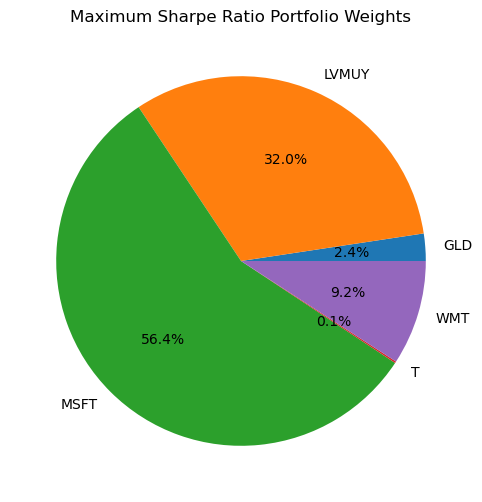

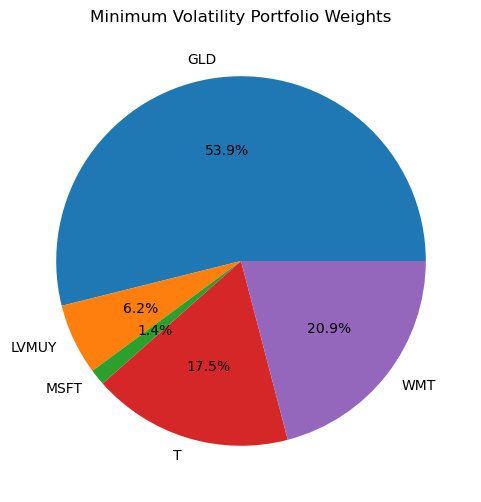

In [43]:
plt.figure(figsize=(6,6))
plt.pie(max_sharpe_weights_df['Maximum_Sharpe_Ratio_Portfolio_Weights'], labels=max_sharpe_weights_df.index, autopct='%1.1f%%')
plt.title('Portfolio 1 - ')
plt.show()

# Create pie chart for Minimum Volatility Portfolio
plt.figure(figsize=(6,6))
plt.pie(min_vol_weights_df['Minimum_Volatility_Portfolio_Weights'], labels=min_vol_weights_df.index, autopct='%1.1f%%')
plt.title('Minimum Volatility Portfolio Weights')
plt.show()

In [44]:
min_vol_weights

array([0.53898006, 0.06235674, 0.01406148, 0.17533786, 0.20926386])

In [45]:
max_sharpe_port_positive_var = (np.dot(max_sharpe_weights.T, np.dot(P1_returns.cov() * 250, max_sharpe_weights)))
min_vol_port_positive_var = (np.dot(min_vol_weights.T, np.dot(P1_returns.cov() * 250, min_vol_weights)))
equal_weighted_var = (np.dot(equal_weights.T, np.dot(P1_returns.cov() * 250, equal_weights)))

In [46]:
# Create a table with details of max_sharpe_port_positive and min_vol_port_positive
portfolio_table = pd.DataFrame(index=['Return', 'Volatility', 'Sharpe Ratio', 'Variance'])
portfolio_table['Max Sharpe Ratio'] = [max_sharpe_port_positive['Return'], max_sharpe_port_positive['Volatility'], max_sharpe_port_positive['Sharpe'], max_sharpe_port_positive_var]
portfolio_table['Min Volatility'] = [min_vol_port_positive['Return'], min_vol_port_positive['Volatility'], min_vol_port_positive['Sharpe'], min_vol_port_positive_var]
portfolio_table['Equal weights'] = [equal_weighted_return, equal_weighted_volatility, equal_weighted_sharpe, equal_weighted_var]

portfolio_table

,Max Sharpe Ratio,Min Volatility,Equal weights
Return,0.201364,0.046335,0.112461
Volatility,0.222315,0.114025,0.146157
Sharpe Ratio,0.739327,0.081864,0.516300
Variance,0.049424,0.013002,0.021362
